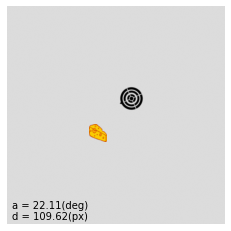

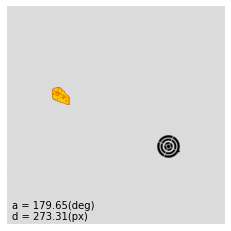

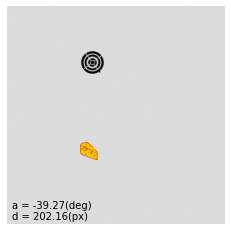

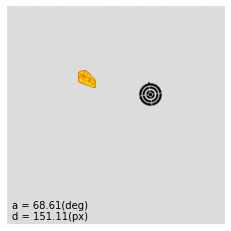

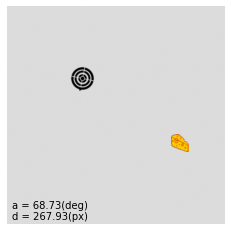

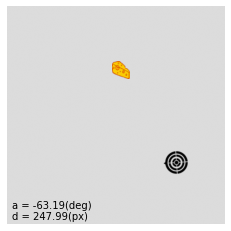

KeyboardInterrupt: 

In [1]:

# pip3 install scipy

import numpy as np
import math
import random
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


import scipy.ndimage as ndimage


SCREEN_WIDTH = 500
SCREEN_HEIGHT = 500

class Mouse:

    def __init__(self, x=SCREEN_WIDTH*2/4, y=SCREEN_HEIGHT*2/4):
        self.x = x
        self.y = y
        self.a = 0
        self.cheese_a = 0.0
        self.cheese_d = float('inf')
        self.image = mpimg.imread('TargetArrow_60px.png')
        self.size = self.image.shape[0]
    
    def getAngDis(self, cheese):
        y = cheese.y-self.y
        x = cheese.x-self.x
        a = math.atan2(y,x)*180/math.pi-self.a
        if a > 180:
            a = a - 360
        elif a < -180:
            a = a + 360
        self.cheese_a = a
        self.cheese_d = math.sqrt(x**2+y**2)


class Cheese:
    def __init__(self, x=SCREEN_WIDTH*3/4, y=SCREEN_HEIGHT*3/4):
        self.x = x
        self.y = y
        self.a = 0
        self.image = mpimg.imread('Cheese_40px.png')
        self.size = self.image.shape[0]
    

def createBackground(width, height):
    bg = np.zeros((height, width,3))
    for r in range(bg.shape[0]):
        for c in range(bg.shape[1]):
            bg[r][c] = (220/255,220/255,220/255) 
    
    return bg

def showStuff(element):
    imgRot = ndimage.rotate((element.image*255).astype('uint8'), element.a, reshape=False)
    plt.imshow(imgRot, extent=(element.x-element.size/2, element.x+element.size/2, element.y-element.size/2, element.y+element.size/2))

def showAngleAndDistance(mouse):
    s_a = "a = " + str(round(mouse.cheese_a,2)) + "(deg)"
    s_d = "d = " + str(round(mouse.cheese_d,2)) + "(px)"
    plt.text(10,10, s_a + "\n" + s_d)

def createRndMouseCheese():
    margin = 100
    mouse = Mouse(random.randrange(margin, SCREEN_WIDTH - margin),random.randrange(margin, SCREEN_HEIGHT - margin))
    cheese = Cheese(random.randrange(margin, SCREEN_WIDTH - margin),random.randrange(margin, SCREEN_HEIGHT - margin))
    mouse.a = random.randrange(0, 360)
    return mouse, cheese

if __name__ == "__main__":
    bg = createBackground(SCREEN_WIDTH, SCREEN_HEIGHT)

    while True:

        mouse, cheese = createRndMouseCheese()
        mouse.getAngDis(cheese)
        

        plt.imshow(bg)

        showStuff(mouse)
        showStuff(cheese)

        showAngleAndDistance(mouse)


        plt.axis([0, SCREEN_WIDTH, 0, SCREEN_HEIGHT])
        plt.axis('off')
        plt.show()
        time.sleep(1)

